# Distribution Objects

Distribution objects represent probability distributions. You can call `rand` to sample from them and `pdf` to evaluate the probability. They can be found in the `Distributions.jl` and `POMDPTools.jl` packages.

In [1]:
using Distributions: rand, pdf
using POMDPTools: SparseCat # Sparse categorical distribution

In [2]:
d = SparseCat(['a', 'b'], [0.8, 0.2])

                 SparseCat distribution           
       ┌                                        ┐ 
   'a' ┤■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.8   
   'b' ┤■■■■■■■■■ 0.2                             
       └                                        ┘ 

In [3]:
[rand(d) for _ in 1:10]

10-element Vector{Char}:
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)

In [4]:
pdf(d, 'a'), pdf(d, 'b')

(0.8, 0.2)

# POMDPs.jl

In [5]:
using POMDPs
using POMDPModels: SimpleGridWorld
using POMDPTools: render

In [6]:
m = SimpleGridWorld()

SimpleGridWorld
  size: Tuple{Int64, Int64}
  rewards: Dict{StaticArraysCore.SVector{2, Int64}, Float64}
  terminate_from: Set{StaticArraysCore.SVector{2, Int64}}
  tprob: Float64 0.7
  discount: Float64 0.95


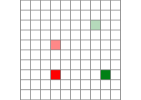

In [7]:
render(m)

# Interacting with POMDPs.jl models

You can access all of the members of the $(S, A, R, T, \gamma, b)$ tuple with the following functions:

In [8]:
states(m)

101-element Vector{StaticArraysCore.SVector{2, Int64}}:
 [1, 1]
 [2, 1]
 [3, 1]
 [4, 1]
 [5, 1]
 [6, 1]
 [7, 1]
 [8, 1]
 [9, 1]
 [10, 1]
 [1, 2]
 [2, 2]
 [3, 2]
 ⋮
 [10, 9]
 [1, 10]
 [2, 10]
 [3, 10]
 [4, 10]
 [5, 10]
 [6, 10]
 [7, 10]
 [8, 10]
 [9, 10]
 [10, 10]
 [-1, -1]

In [9]:
actions(m) # things that begin with a colon (:) are called "Symbols"; they are short interned strings

(:up, :down, :left, :right)

In [10]:
@show reward(m, [4,3], :right) # reward(m, s, a)
@show reward(m, [4,3], :right, [5,3]) # reward(m, s, a, sp)

reward(m, [4, 3], :right) = -10.0
reward(m, [4, 3], :right, [5, 3]) = -10.0


-10.0

In [11]:
transition(m, [1,1], :right)

                      SparseCat distribution           
            ┌                                        ┐ 
     [1, 1] ┤■■■■■■■■■■ 0.20000000000000004            
     [1, 2] ┤■■■■■ 0.10000000000000002                 
   [-1, -1] ┤ 0.0                                      
   [-1, -1] ┤ 0.0                                      
     [2, 1] ┤■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.7   
            └                                        ┘ 

In [12]:
[@gen(:sp, :r)(m, [4,3], :right) for _ in 1:10]

10-element Vector{Tuple{StaticArraysCore.SVector{2, Int64}, Float64}}:
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)
 ([-1, -1], -10.0)

In [13]:
discount(m)

0.95

In [14]:
initialstate(m)

POMDPModels.GWUniform((10, 10))

# Running Simulations

In [15]:
using POMDPTools: HistoryRecorder
using POMDPTools: FunctionPolicy

In [16]:
function policy_function(s)
    return rand(actions(m))
end

policy_function (generic function with 1 method)

In [17]:
history = simulate(HistoryRecorder(max_steps=100), m, FunctionPolicy(policy_function))

20-element POMDPTools.Simulators.SimHistory{NamedTuple{(:s, :a, :sp, :r, :info, :t, :action_info), Tuple{StaticArraysCore.SVector{2, Int64}, Symbol, StaticArraysCore.SVector{2, Int64}, Float64, Nothing, Int64, Nothing}}, Float64}:
 (s = [6, 1], a = :down, sp = [6, 1], r = 0.0, info = nothing, t = 1, action_info = nothing)
 (s = [6, 1], a = :down, sp = [6, 1], r = 0.0, info = nothing, t = 2, action_info = nothing)
 (s = [6, 1], a = :right, sp = [6, 1], r = 0.0, info = nothing, t = 3, action_info = nothing)
 (s = [6, 1], a = :up, sp = [6, 2], r = 0.0, info = nothing, t = 4, action_info = nothing)
 (s = [6, 2], a = :left, sp = [5, 2], r = 0.0, info = nothing, t = 5, action_info = nothing)
 (s = [5, 2], a = :down, sp = [4, 2], r = 0.0, info = nothing, t = 6, action_info = nothing)
 (s = [4, 2], a = :right, sp = [5, 2], r = 0.0, info = nothing, t = 7, action_info = nothing)
 (s = [5, 2], a = :right, sp = [5, 1], r = 0.0, info = nothing, t = 8, action_info = nothing)
 (s = [5, 1], a = :left,

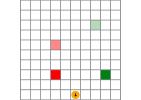

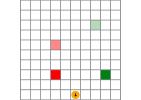

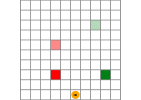

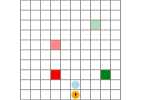

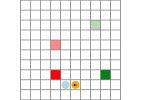

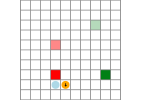

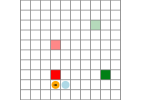

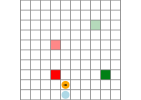

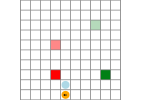

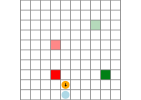

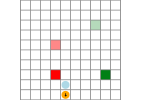

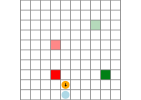

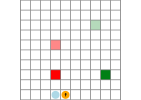

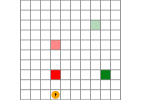

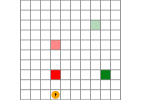

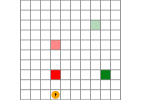

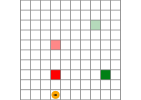

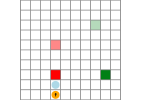

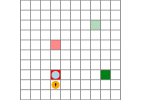

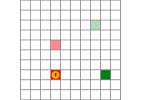

In [18]:
for step in history
    display(render(m, step))
end

In [19]:
using Interact

@manipulate for t in 1:length(history)
    render(m, history[t])
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["t"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 20, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(10), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/zach/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/zach/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/zach/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/home/zach/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/home/zach/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f9b617dd2c0, Task (runnable) @0x00007f9b617dd2c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"16399985796414375328\",\"id\":\"1344078394649735549\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"16399985796414375328\",\"id\":\"1

# Monte Carlo Evaluation

In [20]:
using POMDPTools: RolloutSimulator
using Statistics: mean, std
using Plots: histogram
using LaTeXStrings

In [21]:
function policy_function(s)
    if s[1] < 9
        return :right
    elseif s[2] > 3
        return :down
    else
        return :left
    end
end

p = FunctionPolicy(policy_function)

FunctionPolicy{typeof(policy_function)}(policy_function)

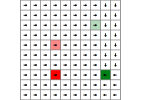

In [22]:
render(m, policy=FunctionPolicy(policy_function))

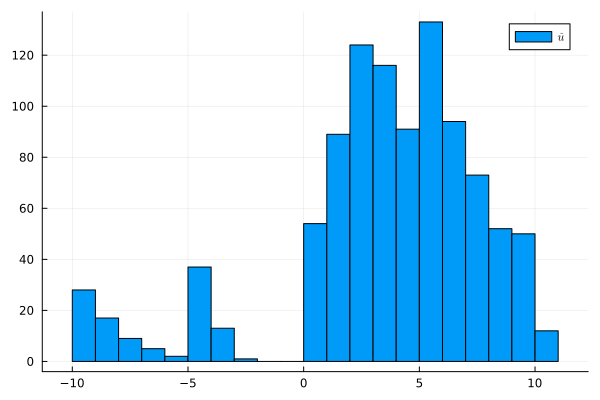

Mean reward (± 3 sem): 3.496851873305579 ± 0.4174356384714116


In [23]:
m_sims=1000
function mc_evaluate(m_simulations=m_sims)
    return [simulate(RolloutSimulator(max_steps=100), m, FunctionPolicy(policy_function)) for _ in 1:m_simulations]
end

uhats = mc_evaluate()

display(histogram(uhats, label=L"\hat{u}"))
println("Mean reward (± 3 sem): $(mean(uhats)) ± $(3*std(uhats)/sqrt(m_sims))") 

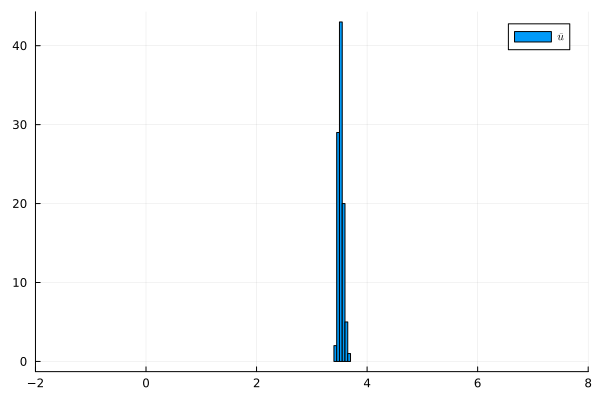

In [31]:
ubars = [mean(mc_evaluate(10000)) for _ in 1:100]
display(histogram(ubars, label=L"\bar{u}", xlim=(-2,8)))

# Value-Based Evaluation

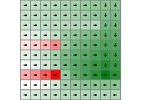

In [25]:
import POMDPTools
using LinearAlgebra: I

T_pi = POMDPTools.Policies.policy_transition_matrix(m, FunctionPolicy(policy_function))
R_pi = POMDPTools.Policies. policy_reward_vector(m, FunctionPolicy(policy_function))
U_pi = (I - discount(m)*T_pi)\R_pi

render(m, policy=FunctionPolicy(policy_function), color=U_pi)

In [26]:
b = initialstate(m)
U_pi_initial_state = 0.0
for s in support(b)
    U_pi_initial_state += pdf(b, s)*U_pi[stateindex(m, s)]
end
U_pi_initial_state # Compare to meain of MC evaluation above

3.523789784801355

.
 
.
 
.
 
.
 
.
 
.
 
.
 
.
 
Extra text is here to prevent bad scrolling when the plot resets.